# Bài tập về nhà 2
### Môn: Linear Algebra

In [1]:
import numpy as np

### Bài tập 1
Ma trận $\exp({X})$ được định nghĩa bởi chuỗi lũy thừa:
$$\exp({X})=\sum^\infty_{k=0}\dfrac{1}{k!}{X}^k$$
ở đó ${X}^0$ là ma trận đơn vị $I$. 

* Hãy viết một hàm tên: *matrix_exp(X,n)* nhận vào ma trận $X$, số nguyên $n$, trả về giá trị xấp xỉ cho $\exp({X})$ bằng khai triển chuỗi đến cấp $n$.
* Sử dụng hàm *matrix_exp(X,n)* để tính xấp xỉ $\exp({X})$ trong các trường hợp: 

> a) ${X}=I$
>
> b) $X = {A}=\left[\begin{matrix}
1 & 0 & -1\\
2 & 1 & 1\\
0 & 0 & 2
\end{matrix}\right]$

In [7]:
A = np.array([1,0,-1,2,1,1,0,0,2]).reshape(3,3)

def matrix_exp(A,n):
    I=np.identity(3)
    s=I
    for i in range(1,n+1):
        s+=np.linalg.matrix_power(A,i)/np.math.factorial(i)
    return s

print("exp(I) = ")
print(matrix_exp(np.identity(3),10))
print("exp(A) = ")
print(matrix_exp(A,10))


exp(I) = 
[[2.7182818 0.        0.       ]
 [0.        2.7182818 0.       ]
 [0.        0.        2.7182818]]
exp(A) = 
[[ 2.7182818   0.         -4.67071291]
 [ 5.43656305  2.7182818   0.76585014]
 [ 0.          0.          7.38899471]]


### Bài tập 2
Hãy viết một chương trình tính tất cả các phần bù đại số của một ma trận.

> Ví dụ tính phần bù đại số:
>
> 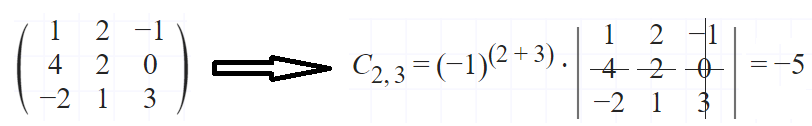

In [8]:
# Hàm tính phần bù đại số của phần tử A(i,j)
def matrix_adj(A):
    n=len(A)
    A_adj=np.empty((n,n))
    for i in range(n):
        Atem=np.delete(A,i,axis=0)
        for j in range(n):
            Mij=np.linalg.det(np.delete(Atem,j,axis=1))
            A_adj[i,j]=pow(-1,i+j)*Mij
    return A_adj

n=3
A = np.random.randint(-5,5,(n,n))
print("Khởi tạo ma trận:")
print(A)
print("Ma trận phần bù đại số:")
A_adj=matrix_adj(A)
print(A_adj)
print("Kiểm tra: A_adj.T*A = det(A)*I ==>",
      np.allclose(A_adj.T@A,np.linalg.det(A)*np.eye(3)))

Khởi tạo ma trận:
[[-2  1  0]
 [-3 -5 -3]
 [-3  2  2]]
Ma trận phần bù đại số:
[[ -4.  15. -21.]
 [ -2.  -4.   1.]
 [ -3.  -6.  13.]]
Kiểm tra: A_adj.T*A = det(A)*I ==> True


### Bài tập 3
Hãy thay đổi chương trình trong ví dụ phân tích ma trận $\bf X=W\,H^T$ với hàm mất mát hiệu chỉnh có dạng như sau:
$$\mathcal{L}({\bf W},{\bf H})=\sum_{(u,i):r_{ui}=1}\left(x_{ui}-\sum^K_{j=1}w_{uj}h_{ij}\right)^2+\lambda\left(\|{\bf W}\|_F^2+\|{\bf H}\|_F^2\right)$$

In [9]:
"""
@INPUT:
    A     : a matrix to be factorized, dimension N x M
    W     : an initial matrix of dimension N x K
    H     : an initial matrix of dimension M x K
    K     : the number of latent features
    steps : the maximum number of steps to perform the optimisation
    beta : the learning rate
    alpha  : the regularization parameter
@OUTPUT:
    the final matrices W and H
"""
def MF_reg(A, W, H, K, steps=5000, beta=0.0002, alpha=0.01):
    H = H.T
    m,n = A.shape
    for step in range(steps):
        for i in range(m):
            for j in range(n):
                if A[i][j] > 0:
                    eij = A[i][j] - np.dot(W[i,:],H[:,j])
                    for k in range(K):
                        W[i][k] = W[i][k] + beta*(2*eij*H[k][j]
                                                  -2*alpha*W[i][k])
                        H[k][j] = H[k][j] + beta*(2*eij*W[i][k]
                                                  -2*alpha*H[k][j])
        e = 0
        for i in range(m):
            for j in range(n):
                if A[i][j] > 0:
                    e += pow(A[i][j]-np.dot(W[i,:],H[:,j]),2)
        e += alpha*(np.linalg.norm(W)**2+np.linalg.norm(H)**2)
        if e < 0.0001:
            break
    return W, H.T

In [10]:
# Khởi tạo ma trận
A = np.array([[5,3,0,1],
              [4,0,0,1],
              [1,1,0,5],
              [1,0,0,4],
              [0,1,5,4]])

# Phân tích ma trận
M = len(A)
N = len(A[0])
K = 2

W = np.random.rand(M,K)
H = np.random.rand(N,K)

nW2, nH2 = MF_reg(A, W, H, K)
print(nW2)
print(nH2)
np.dot(nW2,nH2.T)

[[2.06182789 0.2558162 ]
 [1.63769039 0.29729819]
 [0.16443386 2.25579014]
 [0.21525429 1.80034664]
 [0.26831987 1.828727  ]]
[[2.38102601 0.27085417]
 [1.40447269 0.34072619]
 [0.52867057 2.63030725]
 [0.21401349 2.17933169]]


array([[4.97855472, 2.98294424, 1.76290294, 0.99876734],
       [3.97990787, 2.4013887 , 1.6477843 , 0.99839921],
       [1.00251145, 0.99954963, 6.0203525 , 4.95130601],
       [1.00015745, 0.91574401, 4.84926342, 3.96961981],
       [1.13419491, 0.9999431 , 4.95196671, 4.04282679]])